In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pydotplus

In [13]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [14]:
iris_features_E = 'sepal length','sepal width','petal length','petal width'
iris_feature = '花萼长度','花萼宽度','花瓣长度','花瓣宽度'
iris_class = 'Iris_setosa','Iris-versicoclor','Iris-virginca'

In [15]:
path = 'iris.data'
data = pd.read_csv(path,header=None)

In [16]:
x = data[list(range(4))]

In [17]:
y = LabelEncoder().fit_transform(data[4])
#y = pd.Categorical(data[4]).codes

In [18]:
x = x.iloc[:,:2] # 方便可视化，提取前两个特征
#x = x[[0,1]]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
#决策树参数估计
# min_samples_split = 10：如果该结点包含的样本数目大于10，则(有可能)对其分支
# min_samples_leaf = 10：若将某结点分支后，得到的每个子结点样本数目都大于10，则完成分支；否则，不进行分支
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_test_hat = model.predict(x_test) # 测试数据
print('accuracy_score:',accuracy_score(y_test,y_test_hat))

accuracy_score: 0.622222222222


In [22]:
#保存
#dot -Tpng my.dot -o my.npg
#1、输出
with open('iris.dot','w') as f:
    tree.export_graphviz(model,out_file=f)
    
#2、给定文件名
#tree.export_graphviz(model,out_file='iris1.dot')
#3、输出为PDF 格式
dot_data = tree.export_graphviz(model,out_file=None,feature_names=iris_features_E[0:2],class_names=iris_class,
                               filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')
f.close()

In [23]:
# 画图
N, M = 50, 50  # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
print(x_show.shape)

(2500, 2)


(2500,)
[0 0 0 ..., 2 2 2]
[[0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]]


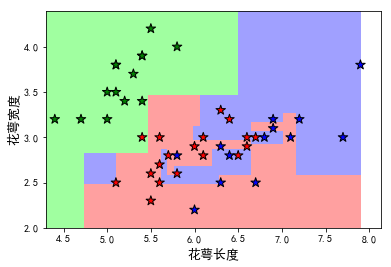

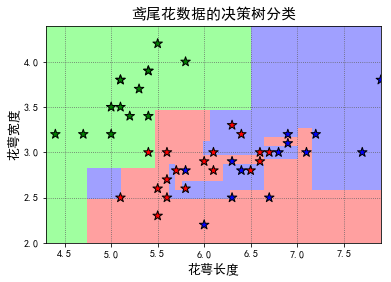

In [26]:
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g','r','b'])
y_show_hat = model.predict(x_show) #预测值
print(y_show_hat.shape)
print(y_show_hat)
y_show_hat = y_show_hat.reshape(x1.shape) #使之于输入的形状相同
print(y_show_hat)
plt.figure(facecolor='w')
plt.pcolormesh(x1,x2,y_show_hat,cmap=cm_light) # 预测值的显示
plt.scatter(x_test[0],x_test[1],c=y_test.ravel(),edgecolors='k',
           s=100,zorder=10,cmap=cm_dark,marker='*') #测试数据
plt.xlabel(iris_feature[0],fontsize=13)
plt.ylabel(iris_feature[1],fontsize=13)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.grid(b=True,ls=':',color='#606060')
plt.title('鸢尾花数据的决策树分类',fontsize=15)
plt.show()

[0 1 2 0 2 2 1 0 0 2 2 0 1 2 1 0 2 1 0 0 1 0 2 0 2 1 0 0 1 1 2 2 2 2 1 0 1
 0 2 1 2 0 1 1 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
准确率：62.22%
1 准确率：44.44%
2 准确率：40.00%
3 准确率：20.00%
4 准确率：24.44%
5 准确率：24.44%
6 准确率：26.67%
7 准确率：37.78%
8 准确率：37.78%
9 准确率：35.56%
10 准确率：37.78%
11 准确率：40.00%
12 准确率：40.00%
13 准确率：37.78%
14 准确率：37.78%


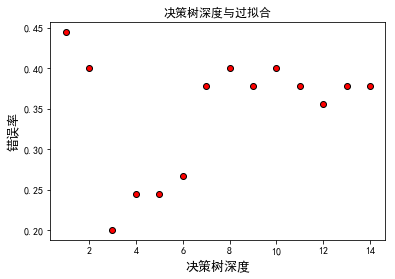

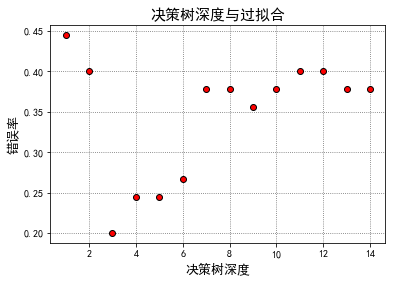

In [28]:
#训练集上的预测结果
y_test = y_test.reshape(-1)
print(y_test_hat)
print(y_test)
result = (y_test_hat == y_test) # True则返回预测正确，False则预测错误
acc = np.mean(result)
print('准确率：%.2f%%' % (100*acc))

#过拟合：错误率
depth = np.arange(1,15)
err_list = []
for d in depth:
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=d)
    clf.fit(x_train,y_train)
    y_test_hat = clf.predict(x_test) #测试数据
    result = (y_test_hat == y_test)
    err = 1 - np.mean(result)
    err_list.append(err)
    print(d,'准确率：%.2f%%' % (100*err))
plt.figure(facecolor='w')
plt.plot(depth,err_list,'ro',markeredgecolor='k',lw=2)
plt.xlabel('决策树深度',fontsize=13)
plt.ylabel('错误率',fontsize=13)
plt.title('决策树深度与过拟合',fontsize=15)
plt.grid(b=True,ls=':',color='#606060')
plt.show()